In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(37) # 使得每次运行得到的随机数都一样

In [2]:
# 准备数据集
dataset_path='D:\PyProjects\DataSet\CarEvaluation/car.data'
df=pd.read_csv(dataset_path,header=None)
print(df.info()) # 加载没有问题
# 原数据集包含有1728个样本，每一个样本含有6个features, 一个label
print(df.head())
raw_set=df.values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
0    1728 non-null object
1    1728 non-null object
2    1728 non-null object
3    1728 non-null object
4    1728 non-null object
5    1728 non-null object
6    1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB
None
       0      1  2  3      4     5      6
0  vhigh  vhigh  2  2  small   low  unacc
1  vhigh  vhigh  2  2  small   med  unacc
2  vhigh  vhigh  2  2  small  high  unacc
3  vhigh  vhigh  2  2    med   low  unacc
4  vhigh  vhigh  2  2    med   med  unacc


In [3]:
# 数据集中的特征向量包括有多个String，故而type是object，需要转换为数值
from sklearn import preprocessing
label_encoder=[] # 放置每一列的encoder
encoded_set = np.empty(raw_set.shape)
for i,_ in enumerate(raw_set[0]):
#     encoder=preprocessing.LabelEncoder()
#     encoder.fit(raw_set[:,i]) # 用某一列来fit这个encoder
#     encoded_set[:,i]=encoder.transform(raw_set[:,i]) # 用同样的这一列来transform
#     label_encoder.append(encoder)
    
    # 上面fit和tranform都是在同一个向量上操作，故而可以整合
    encoder=preprocessing.LabelEncoder()
    encoded_set[:,i]=encoder.fit_transform(raw_set[:,i])
    print(encoder.classes_)
    label_encoder.append(encoder)

dataset_X = encoded_set[:, :-1].astype(int)
dataset_y = encoded_set[:, -1].astype(int)
# print(dataset_X.shape) # (1728, 6)
# print(dataset_y.shape) #(1728,)
print(dataset_X[:5]) # 可以看出每个特征向量都将string转变为int
print(dataset_y[:5]) # 检查没有问题

# 将数据集拆分为train set 和test set
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y=train_test_split(dataset_X,dataset_y,
                                                  test_size=0.3,random_state=42)
# print(train_X.shape) # (1209, 6)
# print(train_y.shape) # (1209,)
# print(test_X.shape) # (519, 6) 

['high' 'low' 'med' 'vhigh']
['high' 'low' 'med' 'vhigh']
['2' '3' '4' '5more']
['2' '4' 'more']
['big' 'med' 'small']
['high' 'low' 'med']
['acc' 'good' 'unacc' 'vgood']
[[3 3 0 0 2 1]
 [3 3 0 0 2 2]
 [3 3 0 0 2 0]
 [3 3 0 0 1 1]
 [3 3 0 0 1 2]]
[2 2 2 2 2]


In [4]:
# 建立随机森林分类器
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=200,max_depth=8,random_state=37)
rf_classifier.fit(train_X,train_y) # 用训练集进行训练

# 用测试集评估模型的准确率，精确率，召回率，F1值：
def print_model_evaluations(classifier,test_X, test_y,cv=5):
    '''print evaluation indicators of classifier on test_set.
    those indicators include: accuracy, precision, recall F1-measure'''
    from sklearn.cross_validation import cross_val_score
    accuracy=cross_val_score(classifier,test_X,test_y,
                             scoring='accuracy',cv=cv)
    print('准确率：{:.2f}%'.format(accuracy.mean()*100))
    precision=cross_val_score(classifier,test_X,test_y,
                             scoring='precision_weighted',cv=cv)
    print('精确度：{:.2f}%'.format(precision.mean()*100))
    recall=cross_val_score(classifier,test_X,test_y,
                             scoring='recall_weighted',cv=cv)
    print('召回率：{:.2f}%'.format(recall.mean()*100))
    f1=cross_val_score(classifier,test_X,test_y,
                             scoring='f1_weighted',cv=cv)
    print('F1  值：{:.2f}%'.format(f1.mean()*100))

print_model_evaluations(rf_classifier,test_X,test_y)    

c:\users\dingr\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


准确率：89.19%


c:\users\dingr\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\dingr\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


精确度：88.49%
召回率：89.19%


c:\users\dingr\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1  值：88.32%


c:\users\dingr\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [5]:
# 打印模型的混淆矩阵和各个类别的评价指标
# 使用sklearn 模块计算混淆矩阵
from sklearn.metrics import confusion_matrix
test_y_pred=rf_classifier.predict(test_X)
confusion_mat = confusion_matrix(test_y, test_y_pred)
print(confusion_mat) #看看混淆矩阵长啥样
print('*'*50)
from sklearn.metrics import classification_report
print(classification_report(test_y, test_y_pred))

[[108   2   7   1]
 [  9   8   0   2]
 [  3   0 355   0]
 [  3   0   0  21]]
**************************************************
             precision    recall  f1-score   support

          0       0.88      0.92      0.90       118
          1       0.80      0.42      0.55        19
          2       0.98      0.99      0.99       358
          3       0.88      0.88      0.88        24

avg / total       0.95      0.95      0.94       519



In [6]:
# 看起来该随机森林分类器的分类效果还是很不错的，
# 那么可以用这个比较理想的模型来预测新数据，
new_sample=['vhigh','vhigh','2','2','small','low']
# 在把这个样本输入模型之前，需要将样本中的string转变为int
# 采用和上面train set相同的encoder来编码
encoded_sample=np.empty(np.array(new_sample).shape)
for i,item in enumerate(new_sample):
    encoded_sample[i]=int(label_encoder[i].transform([item])) 
    # 这儿的item一定要加【】,否则报错。而且要转变为int类型
print(encoded_sample.reshape(1,-1)) # 和上面打印的print(encoder.classes_)对应一致

# 用成熟分类模型对该新样本进行分类，得到分类结果：
output=rf_classifier.predict(encoded_sample.reshape(1,-1))
print('output: {}, class: {}'.format(output,
       label_encoder[-1].inverse_transform(output)[0]))

[[3. 3. 0. 0. 2. 1.]]
output: [2], class: unacc


c:\users\dingr\appdata\local\programs\python\python35\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [7]:
# 提升模型的分类效果：优化模型的某个参数，
# 第一步：优化n_estimators参数
from sklearn.model_selection import validation_curve
optimize_classifier1=RandomForestClassifier(max_depth=4,random_state=37)
parameter_grid=np.linspace(20,400,20).astype(int)
train_scores,valid_scores=validation_curve(optimize_classifier1,train_X,train_y,
                                           'n_estimators',parameter_grid,cv=5) 
# cv=4，会输出4列结果，cv=5，会输出5列结果，
# 故而输出的结果train_scores 的shape为（parameter_grid.shape[0],cv）

# 打印优化结果
print('n_estimators optimization results-------->>>')
print('train scores: \n ',train_scores)
print('-'*80)
print('valid scores: \n ',valid_scores)


n_estimators optimization results-------->>>
train scores: 
  [[0.78549223 0.80144778 0.80785124 0.79338843 0.80165289]
 [0.8        0.80972079 0.81095041 0.81921488 0.83057851]
 [0.8134715  0.81075491 0.81095041 0.81404959 0.81714876]
 [0.80621762 0.81282316 0.81095041 0.81921488 0.82231405]
 [0.80932642 0.81075491 0.80991736 0.81818182 0.81301653]
 [0.80621762 0.81178904 0.80681818 0.81714876 0.80165289]
 [0.80621762 0.80868666 0.8088843  0.81921488 0.80371901]
 [0.80725389 0.81282316 0.80681818 0.81921488 0.80268595]
 [0.80621762 0.81385729 0.80681818 0.82128099 0.80371901]
 [0.80725389 0.81178904 0.80371901 0.82128099 0.80371901]
 [0.80518135 0.81178904 0.80371901 0.82128099 0.80578512]
 [0.80725389 0.81178904 0.80268595 0.82128099 0.80165289]
 [0.80829016 0.81385729 0.80371901 0.82128099 0.80578512]
 [0.80414508 0.81178904 0.80371901 0.82128099 0.80578512]
 [0.80414508 0.81178904 0.80578512 0.82128099 0.80475207]
 [0.80725389 0.81282316 0.80578512 0.82128099 0.80578512]
 [0.807253

In [8]:
# 定义一个绘图函数，绘制train scores 和valid scores
def plot_valid_curve(grid_arr,train_scores,valid_scores,
                     title=None,x_label=None,y_label=None):
    '''plot train_scores and valid_scores into a line graph'''
    assert train_scores.shape==valid_scores.shape, \
        'expect train_scores and valid_scores have same shape'
    assert grid_arr.shape[0]==train_scores.shape[0], \
        'expect grid_arr has the same first dim with train_scores'
    plt.figure()
    plt.plot(grid_arr, 100*np.average(train_scores, axis=1), 
             color='blue',marker='v',label='train_scores')
    plt.plot(grid_arr, 100*np.average(valid_scores, axis=1), 
             color='red',marker='s',label='valid_scores')
    plt.title(title) if title is not None else None
    plt.xlabel(x_label) if x_label is not None else None
    plt.ylabel(y_label) if y_label is not None else None
    plt.legend()
    plt.show()

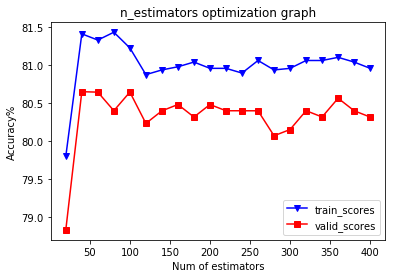

In [9]:
plot_valid_curve(parameter_grid,train_scores,valid_scores,
                 title='n_estimators optimization graph',
                 x_label='Num of estimators',y_label='Accuracy%')

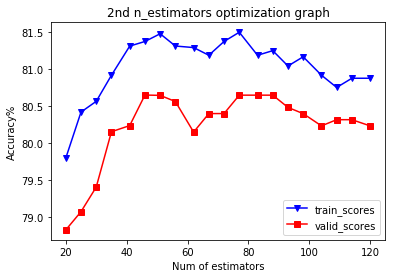

In [10]:
# 第二步：对n_estimators做进一步细致优化
# 图中可以看出，n_estimators在100以内所得到的准确率最高，故而需要进一步做更精细的优化
parameter_grid2=np.linspace(20,120,20).astype(int)
train_scores,valid_scores=validation_curve(optimize_classifier1,train_X,train_y,
                                           'n_estimators',parameter_grid2,cv=5) 
plot_valid_curve(parameter_grid2,train_scores,valid_scores,
                 title='2nd n_estimators optimization graph',
                 x_label='Num of estimators',y_label='Accuracy%')
# 从图中可以看出准确率最高的点是第6,7，12附近，对应的estimators是46,51,77，
# 故而后面暂定为50

[ 2  3  4  5  6  7  8  9 10 11 13]


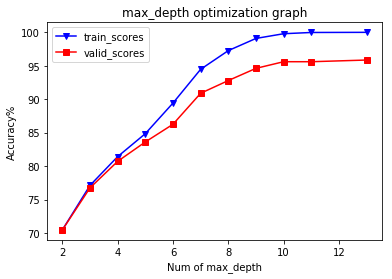

In [11]:
# 第三步：对max_depth进行优化：
optimize_classifier2=RandomForestClassifier(n_estimators=50,random_state=37)
parameter_grid3=np.linspace(2,13,11).astype(int)
print(parameter_grid3) # [ 2  3  4  5  6  7  8  9 10 11 13]
train_scores3,valid_scores3=validation_curve(optimize_classifier2,train_X,train_y,
                                           'max_depth',parameter_grid3,cv=5) 
plot_valid_curve(parameter_grid3,train_scores3,valid_scores3,
                 title='max_depth optimization graph',
                 x_label='Num of max_depth',y_label='Accuracy%')
# 从图中可以看出，取max_depth=10，11,13时准确率一样，故而取max_depth=10

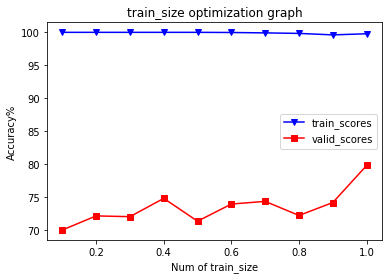

In [12]:
# 前面都是优化随机森林分类器的内置参数，但是没有考虑训练集的大小对模型效果的影响
# 前面都是用traiin_X来优化模型，train_X含有1209个样本，
# 下面考察一下训练集样本大小对模型效果的影响--即学习曲线
from sklearn.model_selection import learning_curve
# optimize_classifier3=RandomForestClassifier(random_state=37)
optimize_classifier3=RandomForestClassifier(n_estimators=50,
                                            max_depth=10,
                                            random_state=37)
parameter_grid4=np.array([0.1,0.2,0.3,0.4,0.5,0.6,0.7,.8,.9,1.]) # dataset最多有1728个样本
train_sizes,train_scores4,valid_scores4=learning_curve(optimize_classifier3,
                                                       dataset_X,dataset_y,
                                          train_sizes=parameter_grid4,cv=5) 
# print(train_sizes) # [ 138  276  414  552  691  829  967 1105 1243 1382]
# 最大也只能到dataset_X样本数的80%，即1728*0.8=1382
plot_valid_curve(parameter_grid4,train_scores4,valid_scores4,
                 title='train_size optimization graph',
                 x_label='Num of train_size',y_label='Accuracy%')
# 可以看出，在train_size=1382时得到的准确率最大，约为80%左右。

In [13]:
# 用所有最优参数来重新构建模型，并判断此模型的好坏
train_X, test_X, train_y, test_y=train_test_split(dataset_X,dataset_y,
                                                  test_size=0.2,random_state=42)
# 最佳训练集大小为80%

rf_classifier=RandomForestClassifier(n_estimators=50,max_depth=10,random_state=37)
rf_classifier.fit(train_X,train_y) # 用训练集进行训练
print_model_evaluations(rf_classifier,test_X,test_y)    
test_y_pred=rf_classifier.predict(test_X)
confusion_mat = confusion_matrix(test_y, test_y_pred)
print('confusion_mat: ------->>>>>')
print(confusion_mat) #看看混淆矩阵长啥样
print('*'*50)
print('classification report: -------->>>>>>')
print(classification_report(test_y, test_y_pred))

准确率：89.32%


c:\users\dingr\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\dingr\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\dingr\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


精确度：88.49%
召回率：89.32%


c:\users\dingr\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\dingr\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


F1  值：88.45%
confusion_mat: ------->>>>>
[[ 71   7   5   0]
 [  1   9   0   1]
 [  0   0 235   0]
 [  1   0   0  16]]
**************************************************
classification report: -------->>>>>>
             precision    recall  f1-score   support

          0       0.97      0.86      0.91        83
          1       0.56      0.82      0.67        11
          2       0.98      1.00      0.99       235
          3       0.94      0.94      0.94        17

avg / total       0.96      0.96      0.96       346



c:\users\dingr\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
